$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 4 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix ,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import time

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
train = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/train.csv')
test = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/test.csv')

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/1133452389.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


## info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [6]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

## Statistical information

#### from descibe i found out that there is outliers in columns<span style="font-size:20px; color:#48D1CC"> (Num_Bank_Accounts , Delay_from_due_date) </span> because the min is negative value.
#### and also <span style="font-size:20px; color:#48D1CC">(Num_Bank_Accounts	, Num_Credit_Card ,Interest_Rate, Total_EMI_per_month)</span> because they have extreme values which is unrelaistic

In [8]:
train.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

#### and columns <span style="font-size:20px; color:#48D1CC">(Monthly_Inhand_Salary , Num_Bank_Accounts , Num_Credit_Card ,Interest_Rate ,Total_EMI_per_month)</span> are right skewed because mean is bigger than med(50%)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

### Numerical data

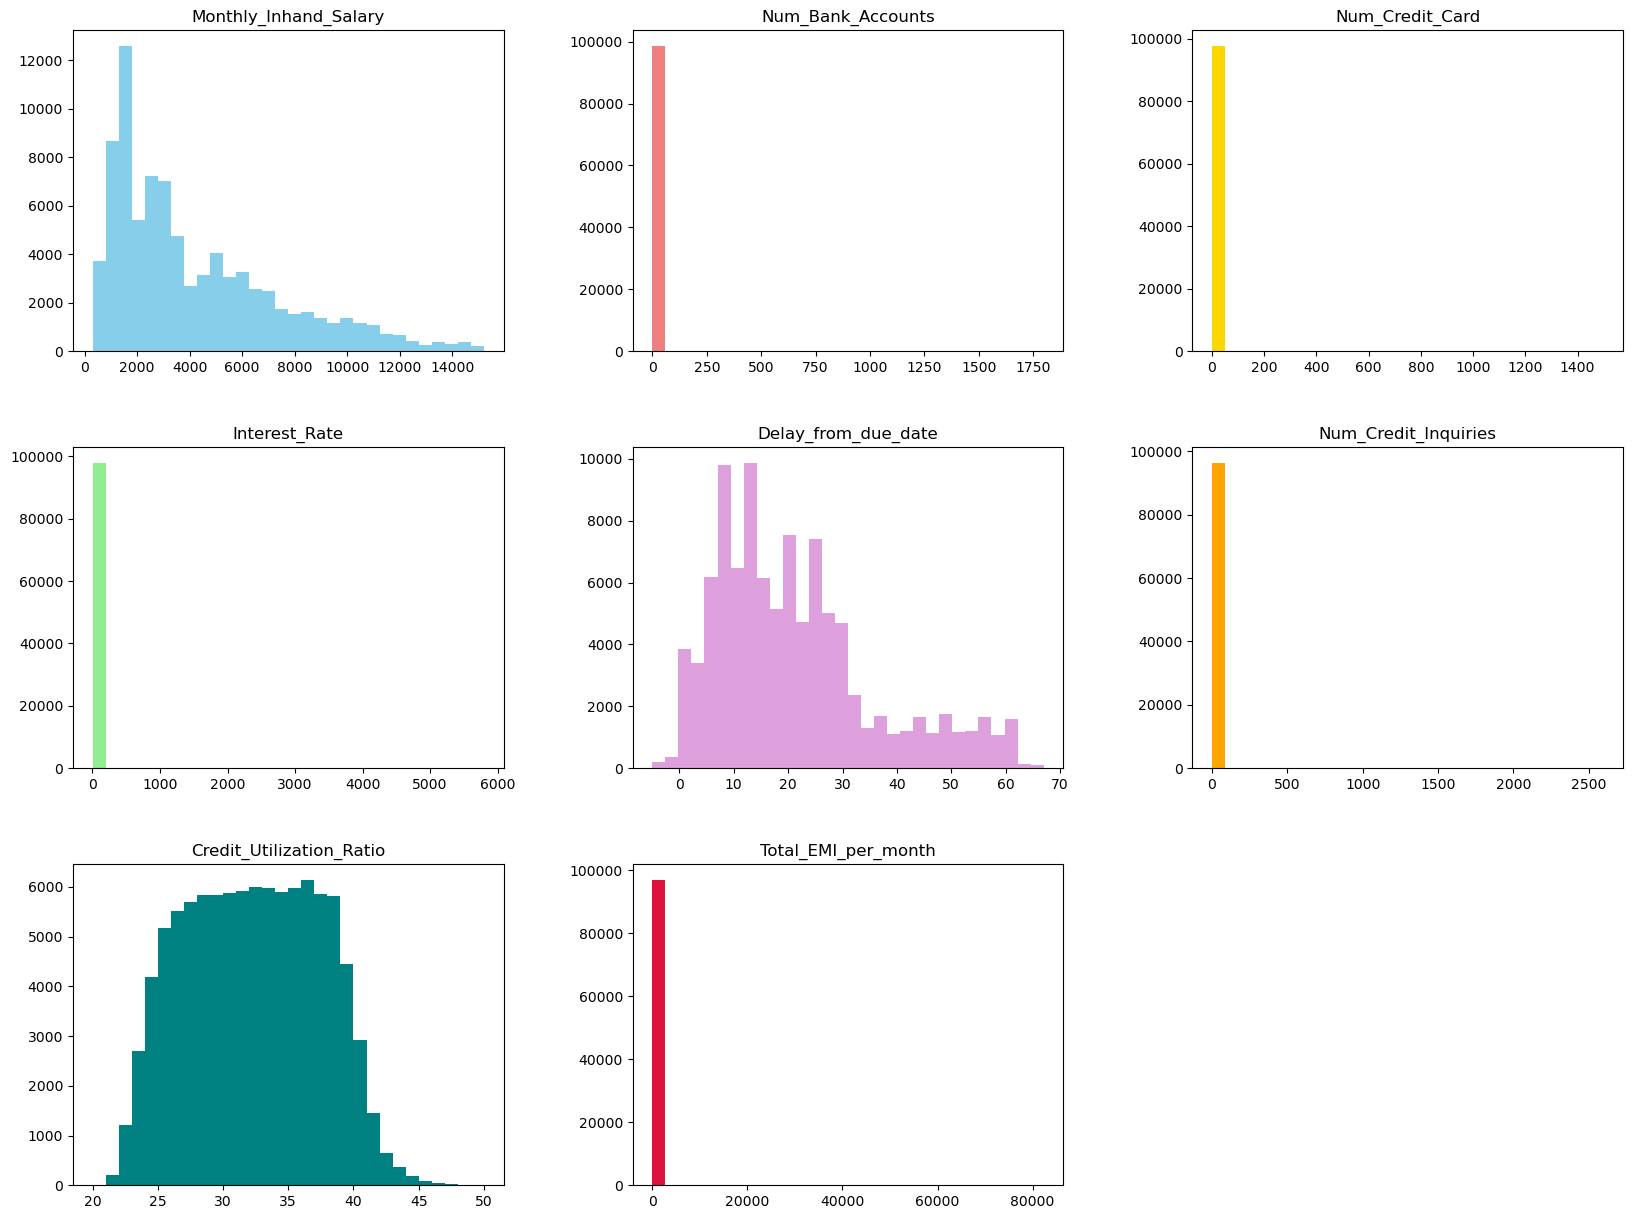

In [9]:
colors = ['skyblue', 'lightcoral', 'gold', 'lightgreen', 'plum', 'orange', 'teal', 'crimson']
axes = train.hist(bins=30, figsize=(20, 15), grid=False)
for ax, color in zip(axes.flatten(), colors * (len(axes.flatten()) // len(colors) + 1)):
    for patch in ax.patches:
        patch.set_facecolor(color)
plt.show()

### Categorical data

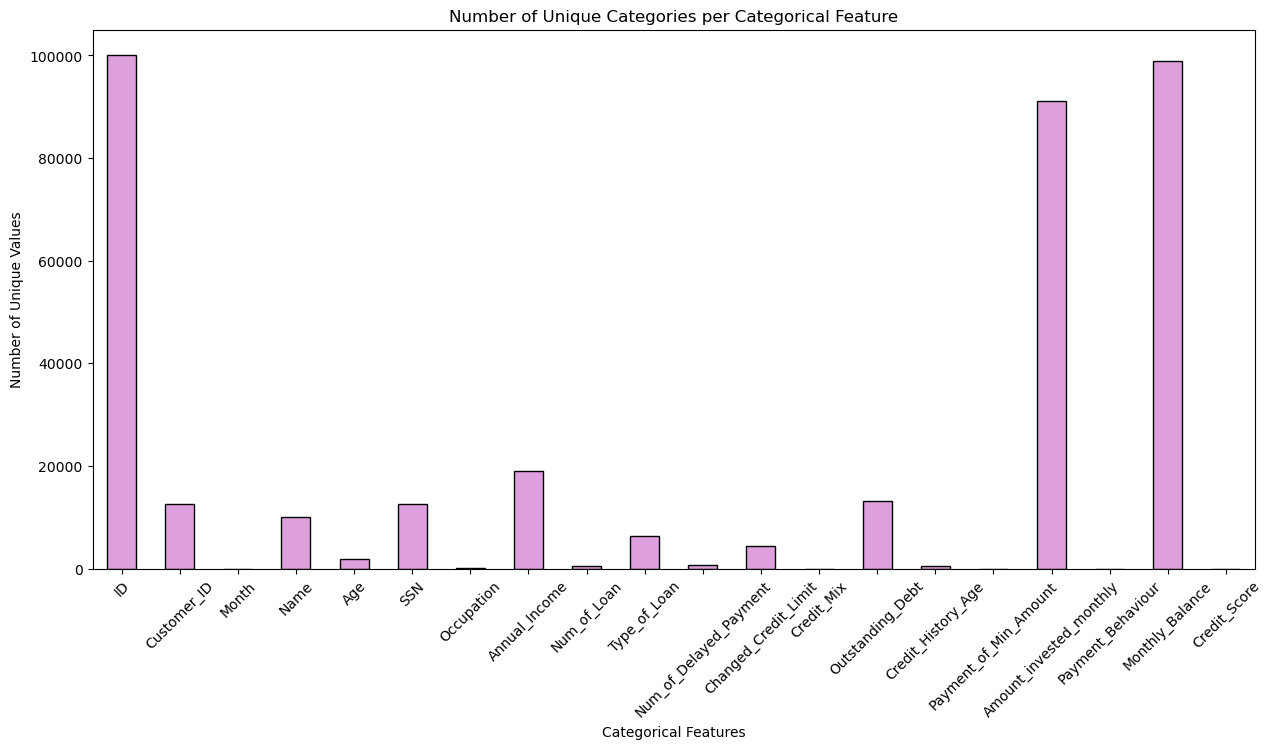

In [10]:
categorical_cols = train.select_dtypes(include=['object']).columns
train[categorical_cols].nunique().plot(kind='bar', figsize=(15, 7), color='plum', edgecolor='black')

plt.title("Number of Unique Categories per Categorical Feature")
plt.xlabel("Categorical Features")
plt.ylabel("Number of Unique Values")
plt.xticks(rotation=45)
plt.show()

### Heat Map

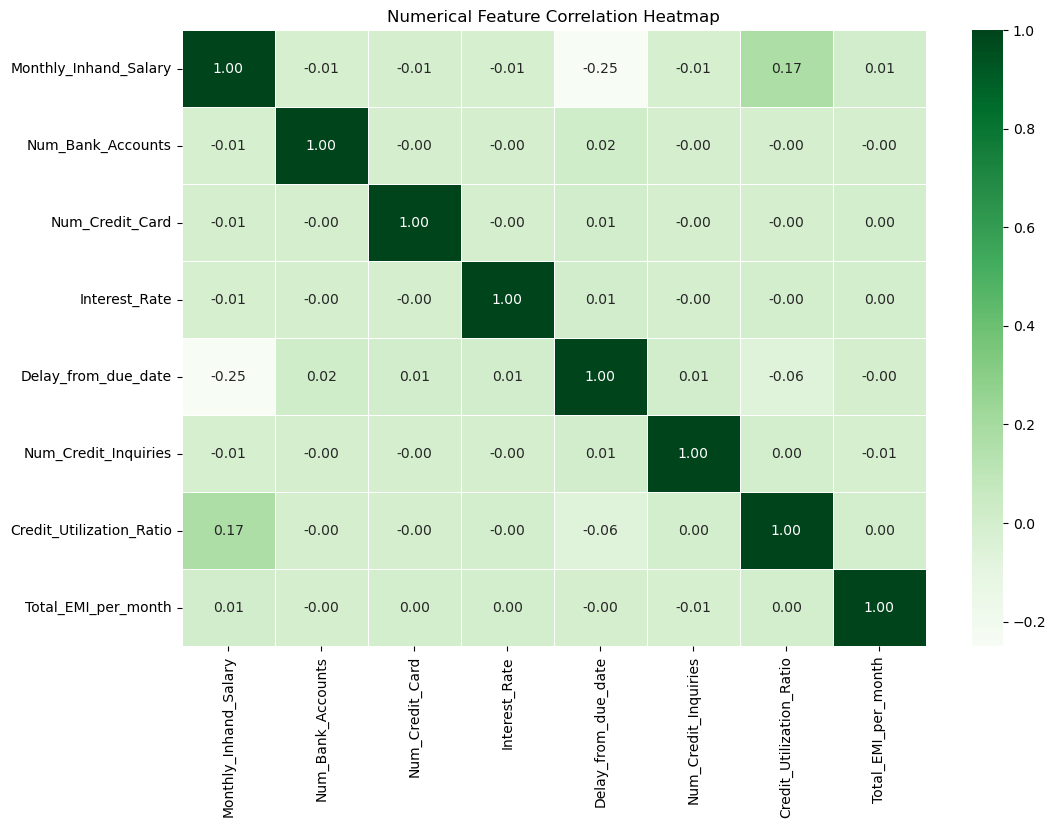

In [11]:
numerical_cols = train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Numerical Feature Correlation Heatmap")
plt.show()

### box plot

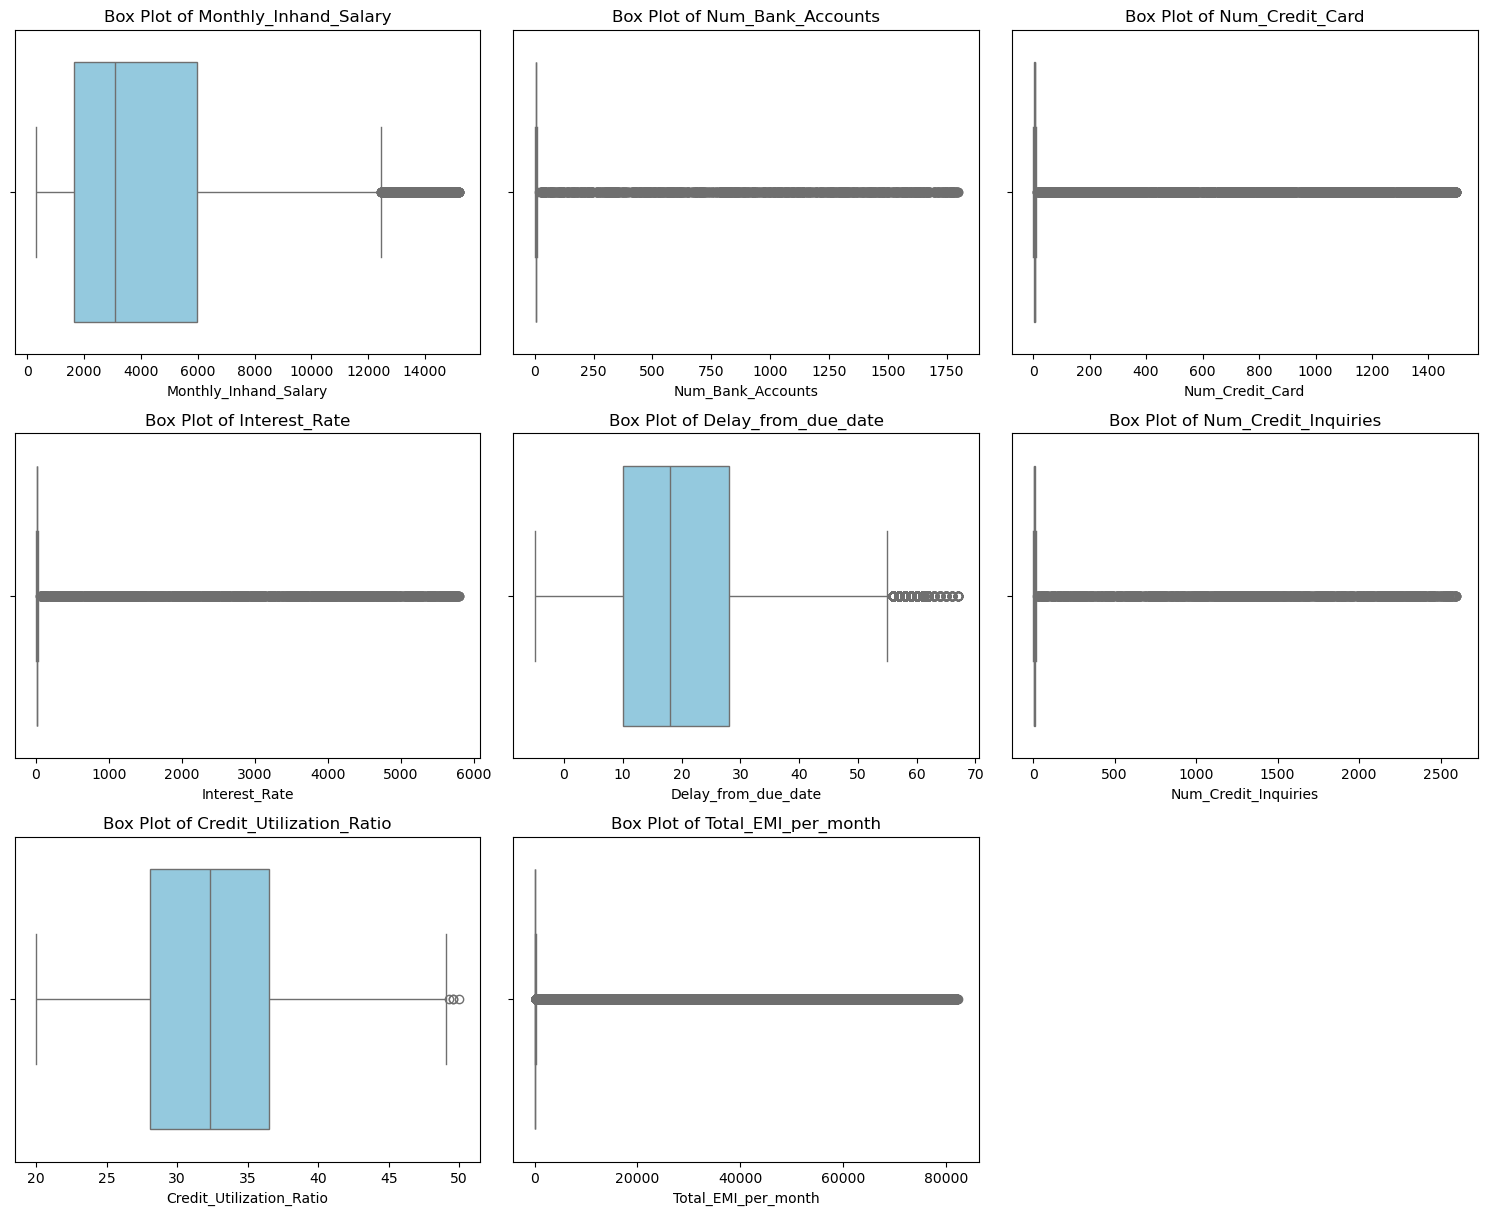

In [12]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)
    sns.boxplot(data=train, x=col, color='skyblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### Scatter plot

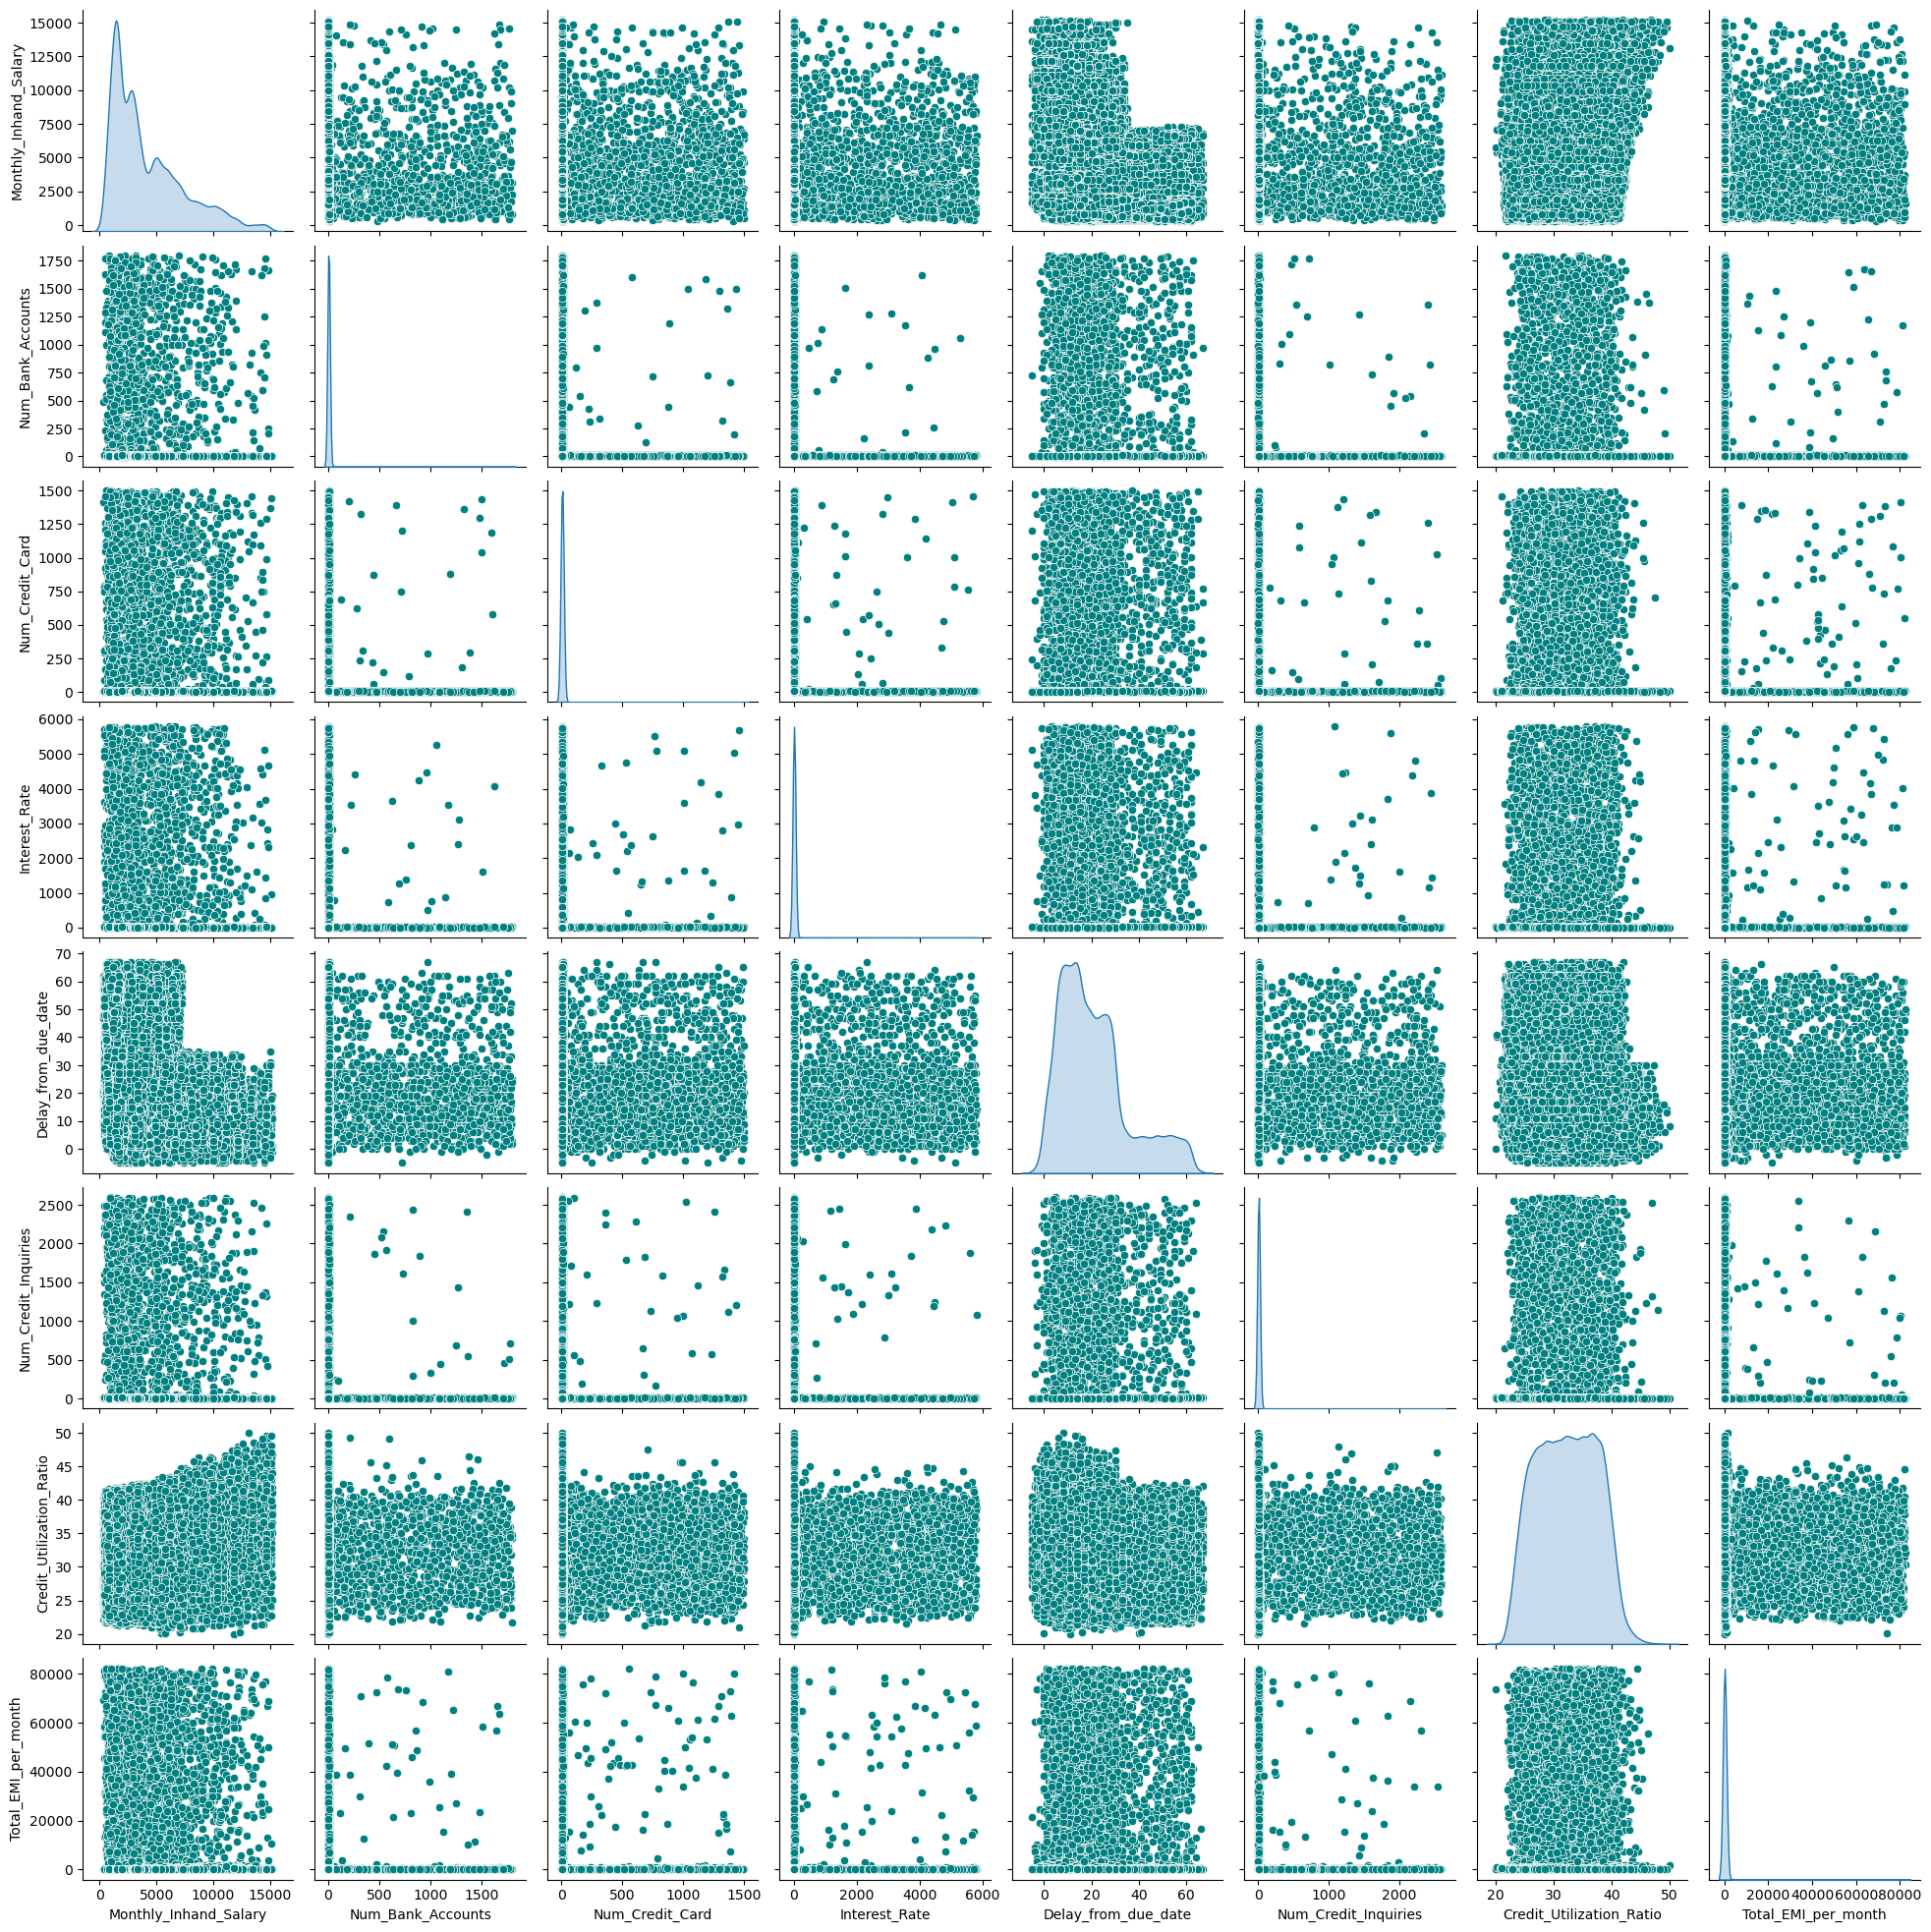

In [13]:
numerical_data = train.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numerical_data, diag_kind='kde', plot_kws={'color': 'teal'})

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hints:
- It could be helpful to check `sklearn.preprocessing` module.
- Remember that Support Vector Machine classifiers require special preprocessing.

### Missing values

In [14]:
train['Name'].fillna(method='bfill', inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/388131872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Name'].fillna(method='bfill', inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/388131872.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['Name'].fillna(method='bfill', inplace=True)


detecting outliers

In [15]:
def detect_outliers(df):
    outlier_cols = []

    for col in df.select_dtypes(include=['int64', 'float64']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if ((df[col] < lower_bound) | (df[col] > upper_bound)).sum() > 0:
            outlier_cols.append(col)

    return outlier_cols

outlier_columns = detect_outliers(train)
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']


fill the columns that contains missing value with median

In [16]:
for col in ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
            'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
            'Credit_Utilization_Ratio', 'Total_EMI_per_month']:
    train[col].fillna(train[col].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/823883153.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [17]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Other missing

In [18]:
for col in ['Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_History_Age',
            'Amount_invested_monthly', 'Monthly_Balance']:
    print(f"{col}: {train[col].dtype}")

Type_of_Loan: object
Num_of_Delayed_Payment: object
Credit_History_Age: object
Amount_invested_monthly: object
Monthly_Balance: object


In [19]:
categorical_cols_to_fill = ['Type_of_Loan', 'Credit_History_Age']
for col in categorical_cols_to_fill:
    train[col].fillna(train[col].mode()[0], inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/2019288121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)


In [20]:
df_filtered = train[train["Num_of_Delayed_Payment"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Num_of_Delayed_Payment"].unique())

train.loc[~train['Num_of_Delayed_Payment'].str.match(r'^\d+$', na=False), 'Num_of_Delayed_Payment'] = np.nan

train.loc[train['Num_of_Delayed_Payment'].astype(float).between(0, 50) == False, 'Num_of_Delayed_Payment'] = np.nan

[nan '8_' '-1' '3_' '2_' '13_' '14_' '12_' '22_' '4_' '11_' '21_' '10_'
 '183_' '9_' '19_' '24_' '17_' '23_' '20_' '-3' '6_' '1_' '16_' '-2' '15_'
 '26_' '18_' '5_' '25_' '7_' '0_' '2569_' '27_' '663_' '-2_' '28_' '-1_'
 '1323_' '2794_' '2219_' '758_' '-3_' '848_' '2237_' '3097_' '2566_'
 '3840_' '2278_' '1087_' '1295_' '3861_' '2142_' '1473_' '3920_']


In [21]:
int_cols = ['Num_of_Delayed_Payment']
train[int_cols] = train[int_cols].astype(float).fillna(0).astype(int)

In [22]:
df_filtered = train[train["Monthly_Balance"].astype(str).str.contains(r"[^-?\d+(\.\d+)?$]", regex=True)]
print(df_filtered["Monthly_Balance"].unique())
train.loc[train["Monthly_Balance"].astype(str).str.contains(r"[^-?\d+(\.\d+)?$]", regex=True, na=False), "Monthly_Balance"] = None

train.loc[~train['Amount_invested_monthly'].astype(str).str.match(r'^\d+(\.\d+)?$'), 'Amount_invested_monthly'] = np.nan

[nan '__-333333333333333333333333333__']


In [23]:
int_cols_to_fill = ['Num_of_Delayed_Payment']
for col in int_cols_to_fill:
    train[col] = train[col].astype(float).astype('Int64')
    train[col].fillna(train[col].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/2006881939.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [24]:
float_cols_to_fill = ['Amount_invested_monthly', 'Monthly_Balance']
for col in float_cols_to_fill:
    train[col] = train[col].astype(float)
    train[col].fillna(train[col].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/231834356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/231834356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [25]:
train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

drop unusful ones

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

handling other corbuted

In [27]:
df_filtered = train[train["Age"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Age"].unique())

train.loc[:, "Age"] = train["Age"].astype(str).str.extract(r'(\d+)')[0]

['-500' '28_' '34_' '30_' '24_' '33_' '35_' '31_' '40_' '37_' '54_' '21_'
 '20_' '43_' '38_' '18_' '2111_' '46_' '16_' '19_' '47_' '53_' '25_' '27_'
 '55_' '42_' '48_' '49_' '50_' '32_' '22_' '17_' '29_' '15_' '51_' '26_'
 '39_' '14_' '36_' '44_' '7670_' '45_' '23_' '41_' '52_' '733_' '5769_'
 '4383_' '56_' '2650_' '3307_' '6962_' '5589_' '6556_' '1447_' '8153_'
 '3834_' '6744_' '6471_' '7723_' '7640_' '6408_' '3502_' '7316_' '1102_'
 '8669_' '2463_' '6666_' '3055_' '1248_' '2220_' '2159_' '4583_' '3988_'
 '2155_' '6770_' '1843_' '1367_' '3742_' '2171_' '5109_' '3984_' '2474_'
 '5046_' '7715_' '2329_' '707_' '844_' '2756_' '2037_' '902_' '8523_'
 '3640_' '3998_' '3712_' '2097_' '8348_' '5373_' '3291_' '2994_' '3339_'
 '2812_' '3578_' '3564_' '1794_' '737_' '4301_' '2846_' '2373_' '1188_'
 '8207_' '5909_' '6381_' '8616_' '6799_' '1591_' '3775_' '6564_' '7122_'
 '4913_' '5697_' '3843_' '4445_' '6921_' '780_' '1070_' '5798_' '4808_']


In [28]:
train.loc[train["Annual_Income"].astype(str).str.contains(r"[^0-9.]", regex=True), "Annual_Income"] = np.nan

In [29]:
train["Annual_Income"] = train["Annual_Income"].astype(float)
train["Annual_Income"].fillna(train["Annual_Income"].mean(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/936356973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Annual_Income"].fillna(train["Annual_Income"].mean(), inplace=True)


In [30]:
train["Occupation"] = train["Occupation"].replace("_______", np.nan)
train["Occupation"].fillna(method="bfill", inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/863753705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Occupation"].fillna(method="bfill", inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/863753705.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train["Occupation"].fillna(method="bfill", inplace=True)


In [31]:
train["Changed_Credit_Limit"] = (
    train["Changed_Credit_Limit"]
    .astype(str)
    .str.replace("_", "")
    .replace("", np.nan)
    .astype(float)
)

train["Changed_Credit_Limit"].fillna(train["Changed_Credit_Limit"].mean(), inplace=True)


/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/4150836840.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Changed_Credit_Limit"].fillna(train["Changed_Credit_Limit"].mean(), inplace=True)


In [32]:
train["Credit_Mix"] = train["Credit_Mix"].str.replace("_", "").replace("", np.nan)
train["Credit_Mix"].fillna(method="bfill", inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/515581001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Credit_Mix"].fillna(method="bfill", inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/515581001.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train["Credit_Mix"].fillna(method="bfill", inplace=True)


In [33]:
train["Payment_Behaviour"] = train["Payment_Behaviour"].astype(str).str.replace(r"[^a-zA-Z\s]", "", regex=True)
train["Payment_Behaviour"].replace("", np.nan, inplace=True)
train["Payment_Behaviour"].fillna(method="bfill", inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/4091735950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Payment_Behaviour"].replace("", np.nan, inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/4091735950.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [34]:
train = train.drop(columns=['ID','Customer_ID','Name','SSN','Age'])

In [35]:
train["Payment_Behaviour"].fillna(train["Payment_Behaviour"].mode()[0], inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/3413846765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Payment_Behaviour"].fillna(train["Payment_Behaviour"].mode()[0], inplace=True)


In [36]:
train.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [37]:
X = train.drop(columns=["Credit_Score"])
y = train["Credit_Score"]

In [38]:
log_cols = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
            'Interest_Rate', 'Num_Credit_Inquiries',
            'Credit_Utilization_Ratio', 'Total_EMI_per_month']

train[log_cols] = train[log_cols].apply(np.log1p)

In [39]:
train['Delay_from_due_date'] = train['Delay_from_due_date'].apply(lambda x: max(x, 0))
train['Delay_from_due_date'] = np.log1p(train['Delay_from_due_date'])

In [40]:
q1 = train["Annual_Income"].quantile(0.25)
q3 = train["Annual_Income"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = train[(train["Annual_Income"] < lower_bound) | (train["Annual_Income"] > upper_bound)]
print(outliers)

          Month     Occupation  Annual_Income  Monthly_Inhand_Salary  \
54         July         Lawyer     10909427.0               8.037461   
245        June      Scientist       586359.0               7.429621   
361    February   Entrepreneur     18334118.0               8.382629   
368     January      Architect     19717385.0               6.964547   
379       April        Teacher      2709655.0               8.921454   
...         ...            ...            ...                    ...   
99664   January         Lawyer      5794377.0               8.037461   
99714     March         Doctor     11712577.0               8.037461   
99721  February      Architect      8544730.0               8.070644   
99882     March       Mechanic     16884797.0               8.601892   
99945  February  Media_Manager     10152115.0               8.499001   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
54              0.000000         0.693147       2.197225       

In [41]:
train["Annual_Income"] = np.where(train["Annual_Income"] > upper_bound, upper_bound, train["Annual_Income"])
train["Annual_Income"] = np.where(train["Annual_Income"] < lower_bound, lower_bound, train["Annual_Income"])
train.loc[train["Annual_Income"] > upper_bound, "Annual_Income"] = train["Annual_Income"].median()

In [42]:
train["Annual_Income"] = np.log1p(train["Annual_Income"])

In [43]:
train["Num_of_Loan"] = train["Num_of_Loan"].astype(str).str.replace("_", "").astype(float)
train.loc[train["Num_of_Loan"] < 0, "Num_of_Loan"] = np.nan
train["Num_of_Loan"].fillna(train["Num_of_Loan"].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_9653/1006095938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Num_of_Loan"].fillna(train["Num_of_Loan"].median(), inplace=True)


In [44]:
Q1 = train["Num_of_Loan"].quantile(0.25)
Q3 = train["Num_of_Loan"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train["Num_of_Loan"] = np.clip(train["Num_of_Loan"], lower_bound, upper_bound)

In [45]:
train["Num_Bank_Accounts"] = train["Num_Bank_Accounts"].astype(str).str.replace("_", "", regex=False).astype(float)


In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Occupation                100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  Int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

----------------------

# `05` Linear Support Vector Machine Classifier

Using `sklearn` implementation of linear support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.LinearSVC` class.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [49]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

    X_test[col] = X_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
start_time = time.time()
model_LinearSVC = LinearSVC(random_state=1234, C=0.1)
model_LinearSVC.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred_LinearSVC = model_LinearSVC.predict(X_test_scaled)

accuracy_LinearSVC = accuracy_score(y_test, y_pred_LinearSVC)
precision_LinearSVC = precision_score(y_test, y_pred_LinearSVC, average='weighted')
recall_LinearSVC = recall_score(y_test, y_pred_LinearSVC, average='weighted')
f1_LinearSVC = f1_score(y_test, y_pred_LinearSVC, average='weighted')
training_time_LinearSVC = end_time - start_time

print("LinearSVC Classifier:")
print(f"Accuracy: {accuracy_LinearSVC:.4f}")
print(f"Precision: {precision_LinearSVC:.4f}")
print(f"Recall: {recall_LinearSVC:.4f}")
print(f"F1-score: {f1_LinearSVC:.4f}")
print(f"Training time: {training_time_LinearSVC:.4f} seconds")
print(classification_report(y_test, y_pred_LinearSVC))

LinearSVC Classifier:
Accuracy: 0.6042
Precision: 0.5983
Recall: 0.6042
F1-score: 0.5903
Training time: 1.6727 seconds
              precision    recall  f1-score   support

        Good       0.52      0.35      0.42      3632
        Poor       0.62      0.46      0.52      5759
    Standard       0.62      0.77      0.69     10609

    accuracy                           0.60     20000
   macro avg       0.58      0.53      0.54     20000
weighted avg       0.60      0.60      0.59     20000



## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

----------------------

# `06` Kernelized Support Vector Machine Classifier

Using `sklearn` implementation of kernelized support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.SVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$
- `kernel` = 'linear'

In [52]:
model_SVC = SVC(kernel='rbf', random_state=1234, C=1.0)

start_time = time.time()
model_SVC.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred_SVC = model_SVC.predict(X_test_scaled)

accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
precision_SVC = precision_score(y_test, y_pred_SVC, average='weighted')
recall_SVC = recall_score(y_test, y_pred_SVC, average='weighted')
f1_SVC = f1_score(y_test, y_pred_SVC, average='weighted')
training_time_SVC = end_time - start_time

print("SVM Classifier (RBF Kernel):")
print(f"Accuracy: {accuracy_SVC:.4f}")
print(f"Precision: {precision_SVC:.4f}")
print(f"Recall: {recall_SVC:.4f}")
print(f"F1-score: {f1_SVC:.4f}")
print(f"Training time: {training_time_SVC:.4f} seconds")
print(classification_report(y_test, y_pred_SVC))


SVM Classifier (RBF Kernel):
Accuracy: 0.6579
Precision: 0.6787
Recall: 0.6579
F1-score: 0.6543
Training time: 1239.8788 seconds
              precision    recall  f1-score   support

        Good       0.51      0.78      0.62      3632
        Poor       0.72      0.45      0.56      5759
    Standard       0.72      0.73      0.72     10609

    accuracy                           0.66     20000
   macro avg       0.65      0.65      0.63     20000
weighted avg       0.68      0.66      0.65     20000



## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Q` Which metric is more reliable?
`Q` Compare the results to those of `sklearn.svm.LinearSVC` class. Also, is there a difference in the training time?

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## `iii` Kernelization Mode: On

Let's try the both `poly` and `rbf` kernels. Use default $C, \gamma, \space and/or \space degree$ parameter(s) for simplicity if you want. Does kernelization make the model better?

Which of the two kernels performs better?

In [54]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)


In [55]:
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("Polynomial Kernel Accuracy:", acc_poly)
print("RBF Kernel Accuracy:", acc_rbf)

Polynomial Kernel Accuracy: 0.63355
RBF Kernel Accuracy: 0.65785


## `iv` Tuning Hyperparameters

Try different  $C, \gamma, \space and/or \space degree$ values and evaluate. What is the best hyperparamters value combination?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` Make sure to tune only relevant hyperparameters per kernel (e.g., don't tune different values for `degree` while using `rbf` kernel)

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [ ]:
param_dist = [
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
]

random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=10,  
    cv=3,  
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .........................C=1, degree=2, kernel=poly; total time=14.4min
[CV] END .........................C=1, degree=2, kernel=poly; total time=14.5min
[CV] END .........................C=1, degree=2, kernel=poly; total time=14.7min


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$